Loaded model from disk
Found 7178 images belonging to 7 classes.


C:\Users\hp\AppData\Local\Temp\ipykernel_4572\3708585388.py:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[124  14 112 266 160 165 117]
 [ 17   1  11  30  25  15  12]
 [152   8 129 267 170 169 129]
 [237  22 230 479 308 266 232]
 [183  13 171 311 221 184 150]
 [161  20 168 328 232 195 143]
 [118   9 107 234 143 124  96]]


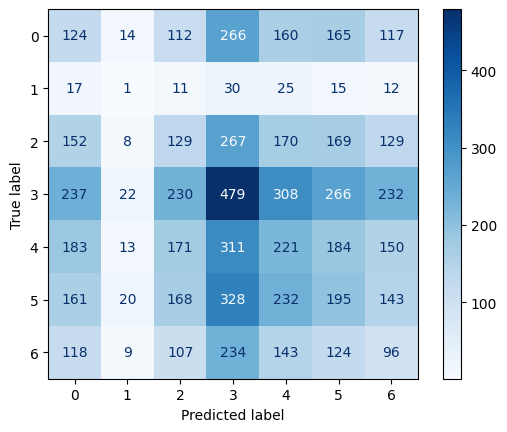

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.12      0.13      0.13       958
           1       0.01      0.01      0.01       111
           2       0.14      0.13      0.13      1024
           3       0.25      0.27      0.26      1774
           4       0.18      0.18      0.18      1233
           5       0.17      0.16      0.16      1247
           6       0.11      0.12      0.11       831

    accuracy                           0.17      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.17      0.17      7178



In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# prediction on test data
predictions = emotion_model.predict_generator(test_generator)

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))
